# EDA

Después de haber realizado el ETL, comenzamos con el proceso de EDA cargando el dataset limpio.

In [124]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Replace this with your CSV file path
csv = r'homicidios_limpio.csv'

# Read the CSV file with UTF-8 encoding
df = pd.read_csv(csv, encoding='utf-8')

En el proceso de ETL habíamos decidido lo siguiente:
* El dataset refleja cada una de las víctimas, pudiendo haber más de una víctima por siniestro.
* Conservar el ID del hecho, para tener referencias a la cantidad de decesos por siniestro.
* Fecha en formato YYYY-MM-DD y agregar el día de la semana.
* Solamente conserver la hora sin los minutos para trabajar con franjas horarias.
* Conserver tipo de calle, nombre de calle y altura, pudiendo ser la altura el nombre de la intersección, el número de la altura correspondiente o quedar vacío ya que no se informaron datos (son sólo 2 casos) o bien corresponde a una autopista.
* Utilizar las latitudes y longitudes para hacer referencias geográficas por proximidad más que utilizar las direcciones del siniestro.
* Conservar víctima, acusado, rol, sexo, edad y fecha de fallecimiento.

In [125]:
df.head()

,ID,FECHA,DIA,HH,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,VIERNES,4,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,SABADO,1,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,DOMINGO,7,AVENIDA,ENTRE RIOS AV.,2034.0,1,-58.390403,-34.631894,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,DOMINGO,0,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,2016-01-21,JUEVES,5,AVENIDA,SAN JUAN AV.,"SAENZ PEÑA, LUIS, PRES.",1,-58.387183,-34.622466,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01


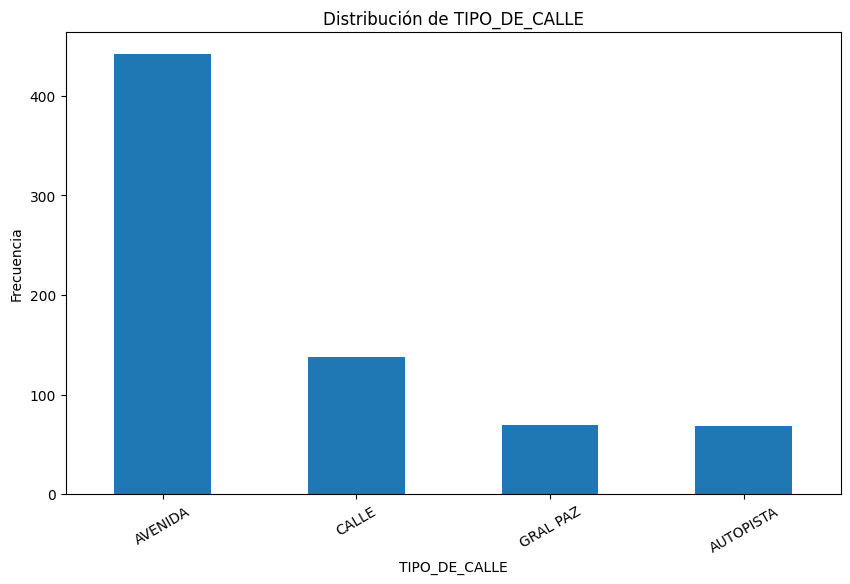

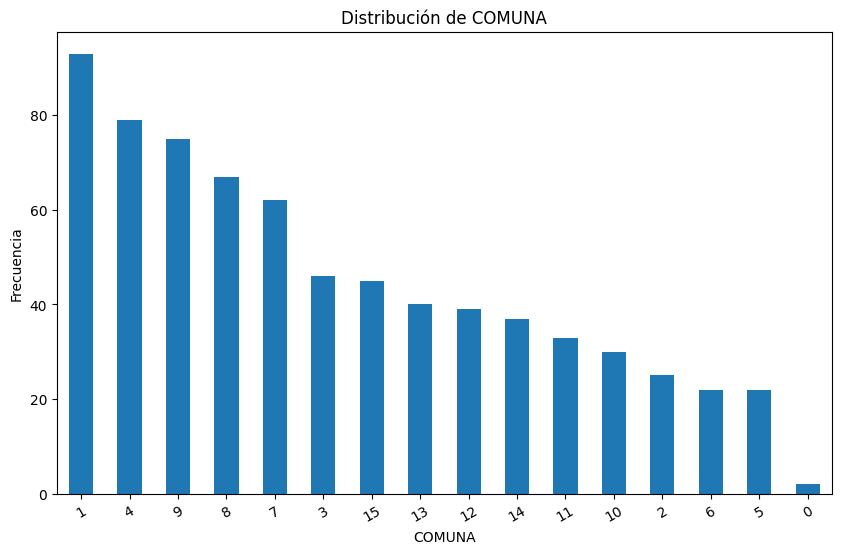

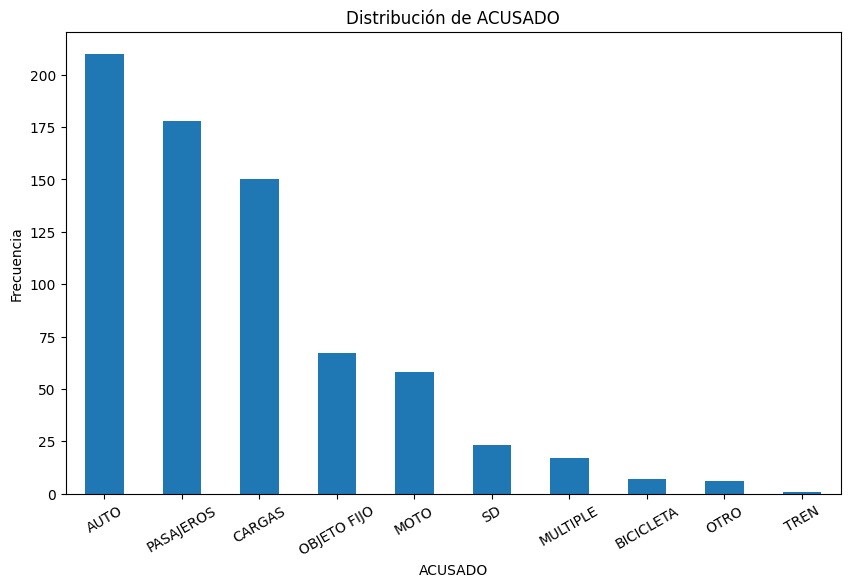

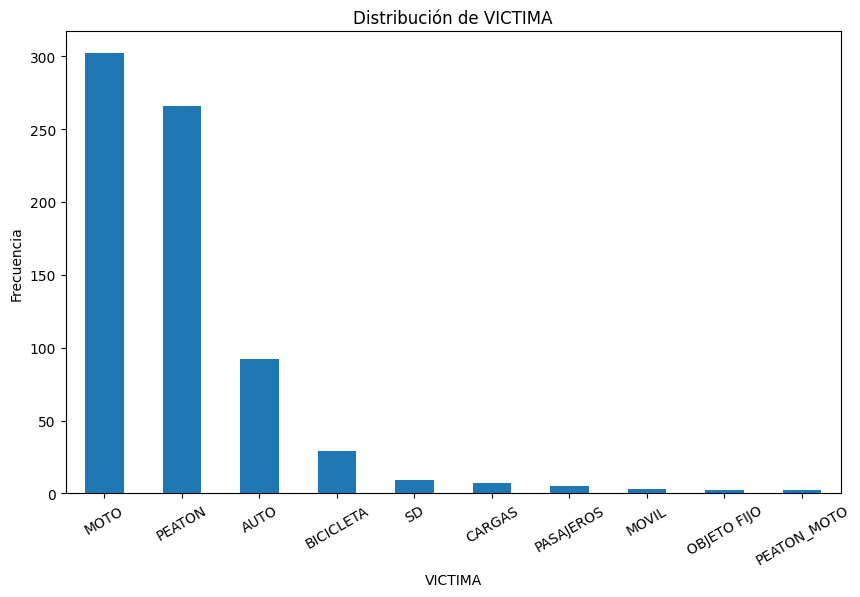

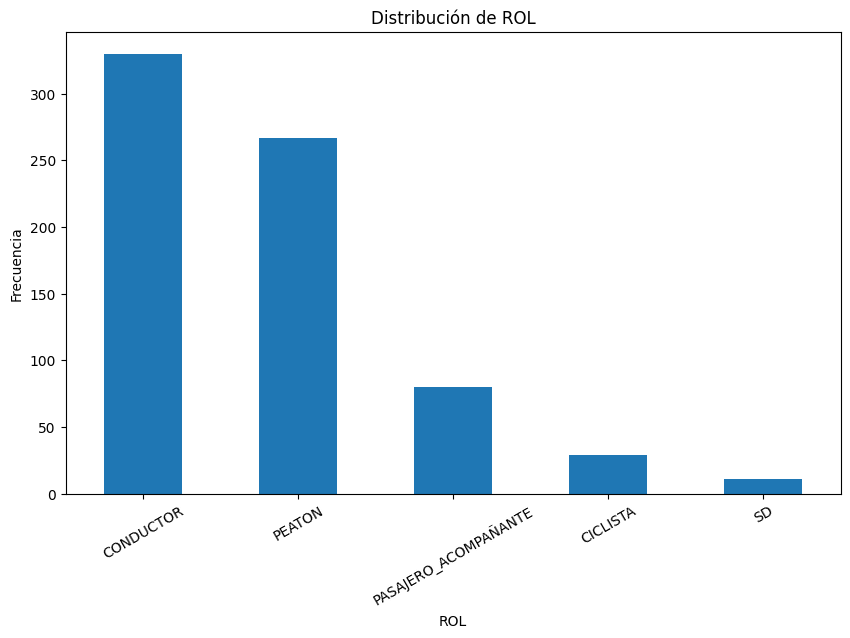

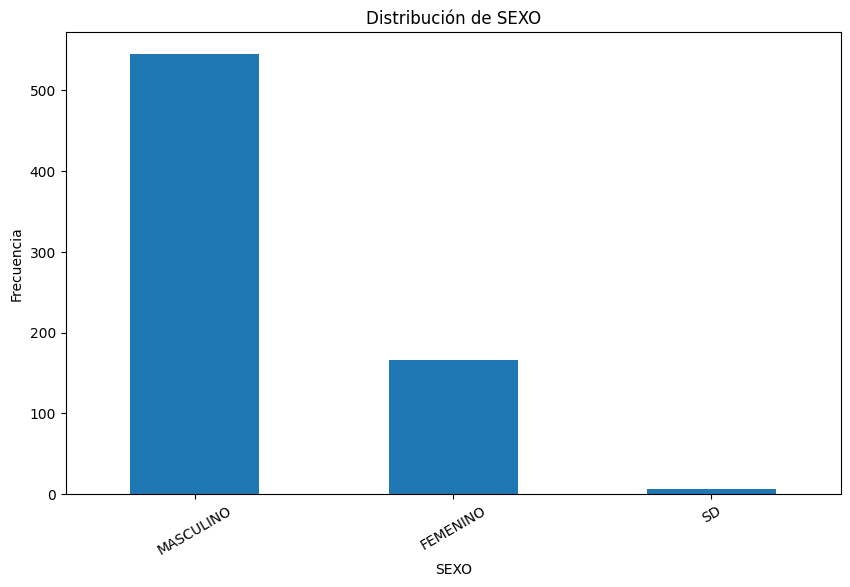

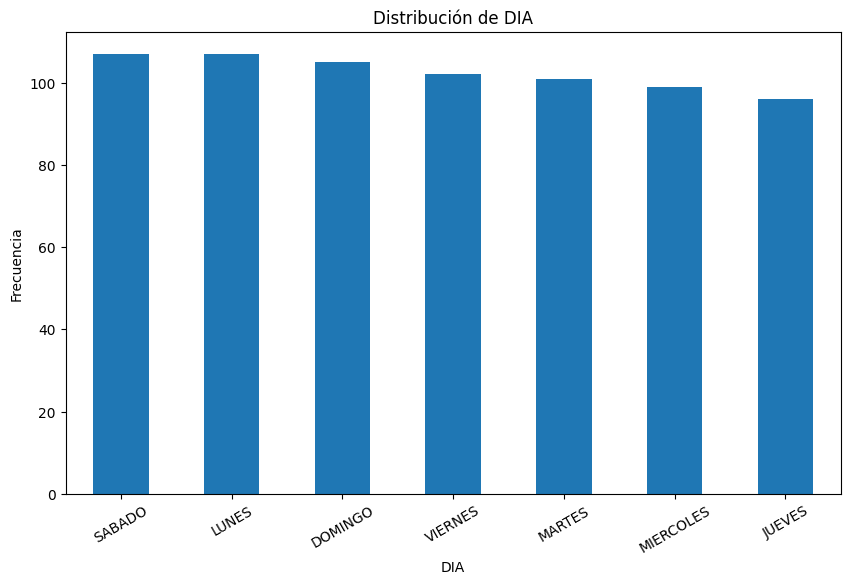

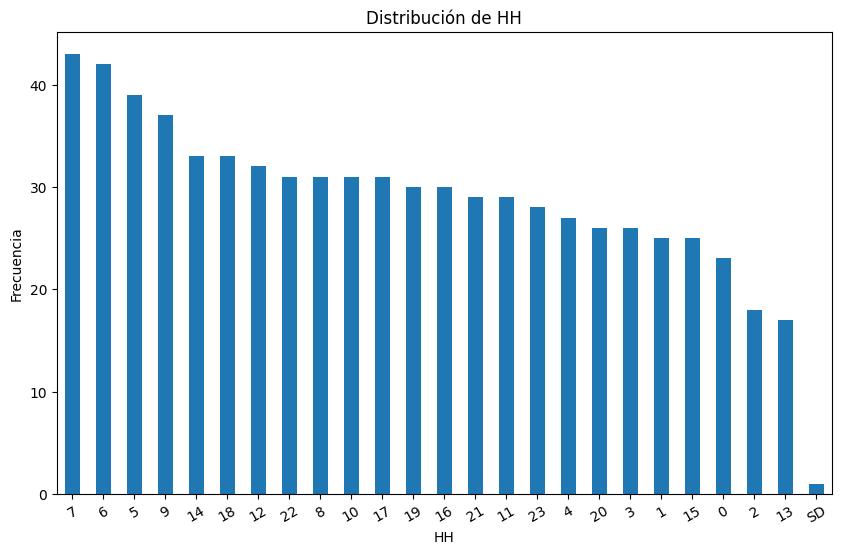

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame, and you want to visualize the frequency distribution of columns
columnas = ["TIPO_DE_CALLE", "COMUNA", "ACUSADO", "VICTIMA", "ROL", "SEXO", "DIA", "HH"]

# Loop through the columns and create bar plots
for col in columnas:
    # Count the frequency of each category in the column
    value_counts = df[col].value_counts()
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    value_counts.plot(kind='bar', title="Distribución de " + str(col))
    
    # Customize the plot (optional)
    plt.xlabel(col)  # Label the x-axis with the column name
    plt.ylabel("Frecuencia")  # Label the y-axis
    plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
    
    plt.show()


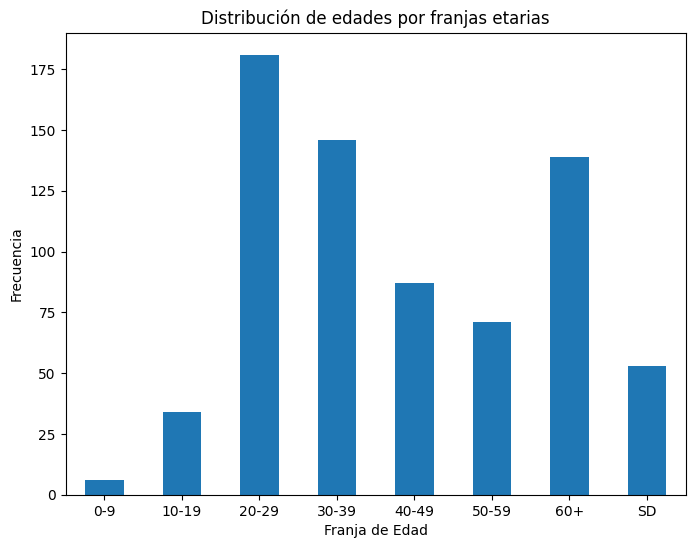

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar y convertir los valores numéricos a números, y contar los 'SD'
numeric_values = []
sd_count = 0

for value in df['EDAD']:
    if value.isnumeric():
        numeric_values.append(int(value))
    elif value == 'SD':
        sd_count += 1

# Crear un DataFrame con los valores numéricos
df_numeric = pd.DataFrame({'EDAD': numeric_values})

# Definir los límites de las franjas de edad
edades_bins = [0, 9, 19, 29, 39, 49, 59, df_numeric['EDAD'].max()]

# Etiquetas para las franjas
edades_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']

# Crear una nueva columna 'edad_franja' que asigna cada edad a una franja
df_numeric['edad_franja'] = pd.cut(df_numeric['EDAD'], bins=edades_bins, labels=edades_labels)

# Contar las frecuencias de cada franja
edad_franja_counts = df_numeric['edad_franja'].value_counts().sort_index()

# Agregar la cuenta de 'SD' a las frecuencias
edad_franja_counts['SD'] = sd_count

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
edad_franja_counts.plot(kind='bar', title='Distribución de edades por franjas etarias')
plt.xlabel('Franja de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


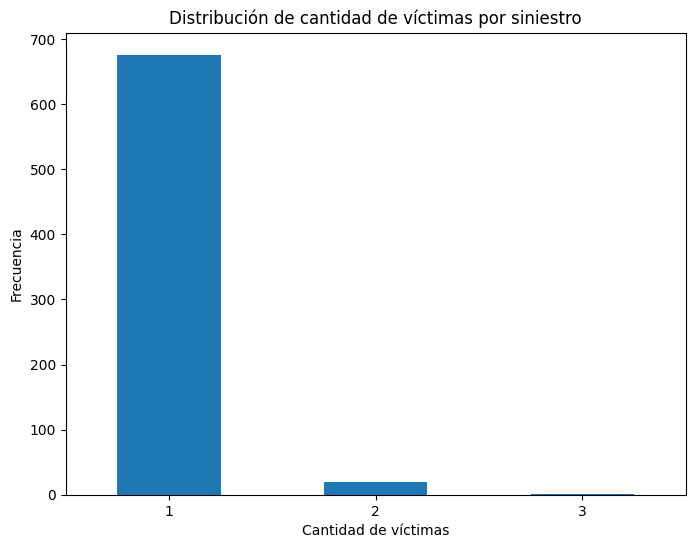

In [128]:

# Contar la frecuencia de cada ID
id_counts = df['ID'].value_counts()

# Contar la frecuencia de ocurrencia de cada frecuencia (1 vez, 2 veces, 3 veces, etc.)
frequency_counts = id_counts.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
frequency_counts.plot(kind='bar', title='Distribución de cantidad de víctimas por siniestro')
plt.xlabel('Cantidad de víctimas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

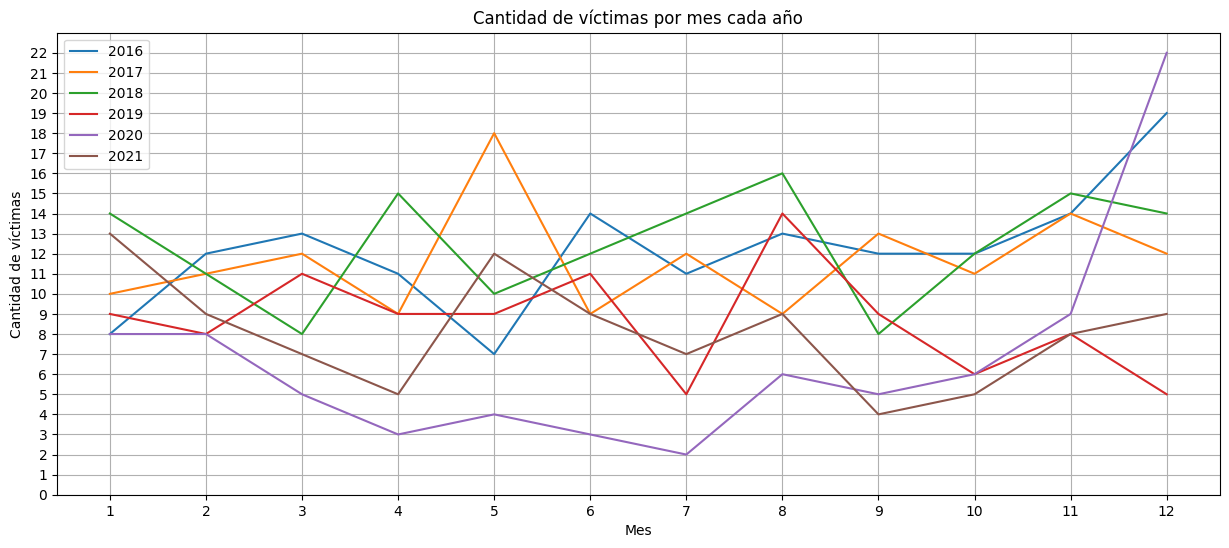

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'FECHA' a tipo de dato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Extraer el año y el mes de la columna 'FECHA'
df['AÑO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month

# Contar la cantidad de filas por año y mes
counts = df.groupby(['AÑO', 'MES']).size().unstack(fill_value=0)

# Crear el gráfico de líneas con un color diferente para cada año
plt.figure(figsize=(15, 6))
for year in counts.index:
    plt.plot(counts.columns, counts.loc[year], label=str(year))

plt.xlabel('Mes')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas por mes cada año')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.yticks(range(0, max(counts.values.max(), 1) + 1))  # Set y-ticks as integers


plt.show()
columns_to_drop = ['AÑO', 'MES']
df = df.drop(columns=columns_to_drop, inplace=True)

In [130]:
df